In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [851]:
data=pd.read_csv("hypothyroid.csv")
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [852]:
data.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [853]:
data.shape

(3772, 30)

In [854]:
data.describe(include="all")

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [855]:
data.nunique()

age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
TBG                            1
referral source                5
binaryClass                    2
dtype: int

In [856]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [857]:
data.binaryClass.value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [858]:
data.binaryClass=data.binaryClass.map({"P":1,"N":0}).astype(int)

In [859]:
data.sex.value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

In [860]:
data=data.replace({"?":np.NAN})

In [861]:
data.sex.value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [862]:
data.pregnant.value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [863]:
data.pregnant=data.pregnant.replace({"f":0,"t":1})

In [864]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [865]:
data.dtypes

age                           object
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                       int64
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                           object
T3 measured                   object
T3                            object
TT4 measured                  object
TT4                           object
T4U measured                  object
T4U                           object
FTI measured                  object
FTI                           object
TBG measured                  object
T

In [866]:
data=data.replace({"t":1,"f":0})

In [867]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,1
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,1


In [868]:
data["TBG"].value_counts()

Series([], Name: TBG, dtype: int64)

In [869]:
del data["TBG"]

In [870]:
data["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [871]:
del data["referral source"]

In [872]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on thyroxine               3772 non-null   int64 
 3   query on thyroxine         3772 non-null   int64 
 4   on antithyroid medication  3772 non-null   int64 
 5   sick                       3772 non-null   int64 
 6   pregnant                   3772 non-null   int64 
 7   thyroid surgery            3772 non-null   int64 
 8   I131 treatment             3772 non-null   int64 
 9   query hypothyroid          3772 non-null   int64 
 10  query hyperthyroid         3772 non-null   int64 
 11  lithium                    3772 non-null   int64 
 12  goitre                     3772 non-null   int64 
 13  tumor                      3772 non-null   int64 
 14  hypopitu

In [873]:
data["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

In [874]:
data["TBG measured"].value_counts()

0    3772
Name: TBG measured, dtype: int64

In [875]:
data["on thyroxine"].value_counts()

0    3308
1     464
Name: on thyroxine, dtype: int64

In [876]:
data.dtypes

age                          object
sex                          object
on thyroxine                  int64
query on thyroxine            int64
on antithyroid medication     int64
sick                          int64
pregnant                      int64
thyroid surgery               int64
I131 treatment                int64
query hypothyroid             int64
query hyperthyroid            int64
lithium                       int64
goitre                        int64
tumor                         int64
hypopituitary                 int64
psych                         int64
TSH measured                  int64
TSH                          object
T3 measured                   int64
T3                           object
TT4 measured                  int64
TT4                          object
T4U measured                  int64
T4U                          object
FTI measured                  int64
FTI                          object
TBG measured                  int64
binaryClass                 

In [877]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [878]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,2.5,1,125,1,1.14,1,109,0,1
1,23,F,0,0,0,0,0,0,0,0,...,1,2,1,102,0,NaN,0,NaN,0,1
2,46,M,0,0,0,0,0,0,0,0,...,0,NaN,1,109,1,0.91,1,120,0,1
3,70,F,1,0,0,0,0,0,0,0,...,1,1.9,1,175,0,NaN,0,NaN,0,1
4,70,F,0,0,0,0,0,0,0,0,...,1,1.2,1,61,1,0.87,1,70,0,1


In [879]:
colums=data.columns[data.dtypes.eq("object")]
data[columns]=data[columns].apply(pd.to_numeric,errors="coerce")

In [880]:
data.dtypes

age                          float64
sex                           object
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [881]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [882]:
data.fillna(data.mean())

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,1
1,23.0,F,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,1
2,46.0,M,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,1
3,70.0,F,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,1
4,70.0,F,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,1
3768,68.0,F,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,1
3769,74.0,F,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,1
3770,72.0,M,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,1


In [883]:
data.dtypes

age                          float64
sex                           object
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [884]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [885]:
data.sex.value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [886]:
data.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [887]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [889]:
data.sex=data.sex.replace({"F":1,"M":0})

In [890]:
data["sex"].fillna(data["sex"].mean(),inplace=True)

In [891]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")

In [893]:
data["TSH"]=imputer.fit_transform(data[["TSH"]])

In [894]:
data["T3"]=imputer.fit_transform(data[["T3"]])

In [896]:
data["TT4"]=imputer.fit_transform(data[["TT4"]])

In [898]:
data["T4U"]=imputer.fit_transform(data[["T4U"]])

In [899]:
data["FTI"]=imputer.fit_transform(data[["FTI"]])

In [900]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [901]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,1
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,1
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,1
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,1


<AxesSubplot:>

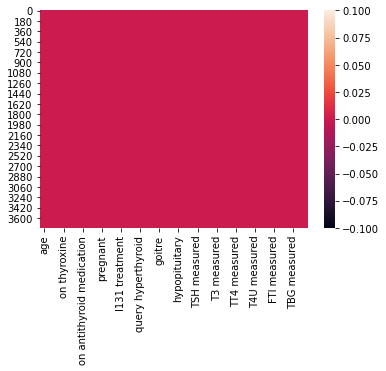

In [907]:
sns.heatmap(data.isnull())

(array([1142.,    0.,    0.,    0.,    0.,    0.,  150.,    0.,    0.,
        2480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

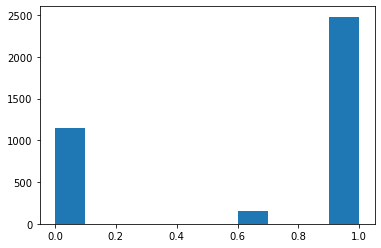

In [910]:
plt.hist(data.sex)

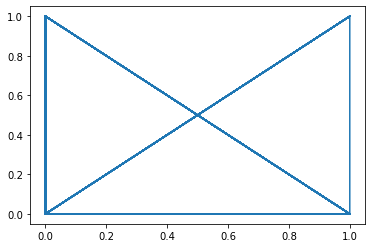

In [918]:
plt.plot(data["on thyroxine"],data["pregnant"])

In [919]:
sns.set(rc={"figure.figsize":[8,8]},font_scale=1.2)

C:\Users\U\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

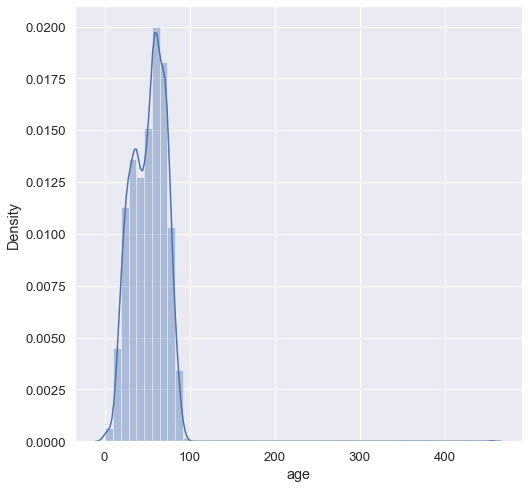

In [921]:
sns.distplot(data["age"])

C:\Users\U\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sex', ylabel='Density'>

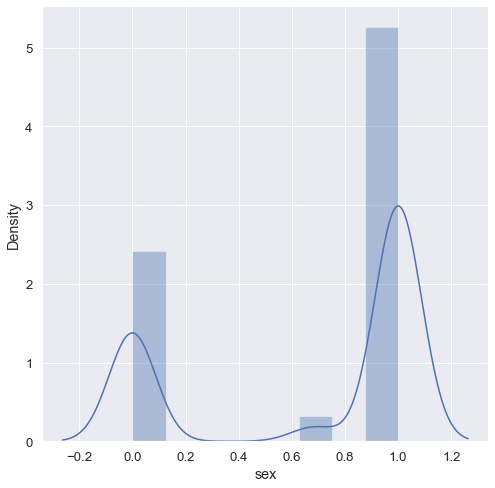

In [922]:
sns.distplot(data.sex)

C:\Users\U\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3', ylabel='Density'>

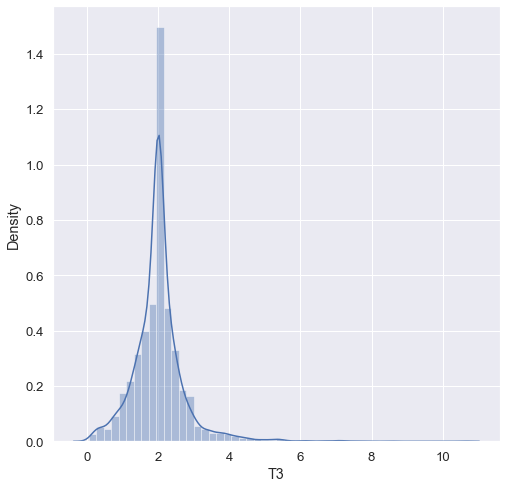

In [923]:
sns.distplot(data.T3)

C:\Users\U\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FTI', ylabel='Density'>

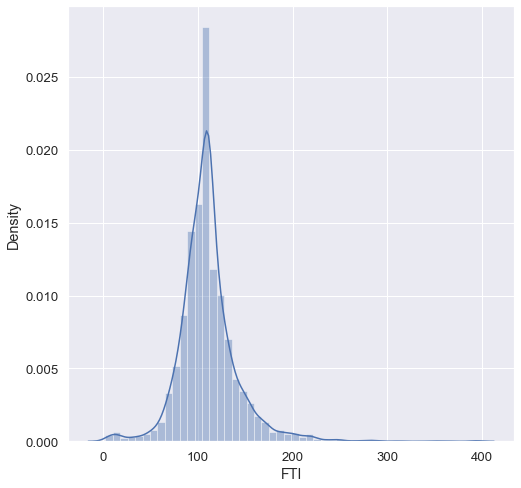

In [924]:
sns.distplot(data['FTI'])

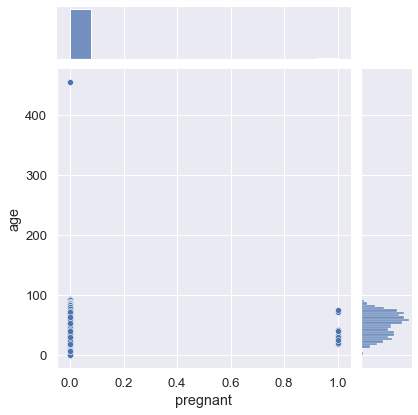

In [929]:
sns.jointplot(x="pregnant",y="age",data=data,kind="scatter")

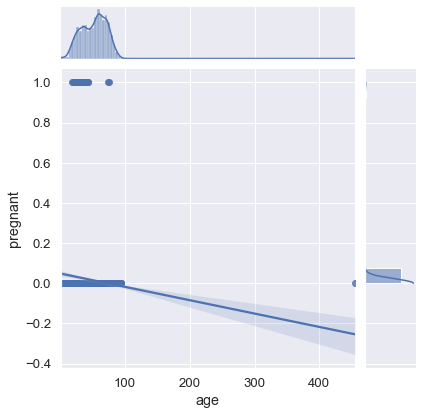

In [931]:
sns.jointplot(x="age",y="pregnant",data=data,kind="reg")

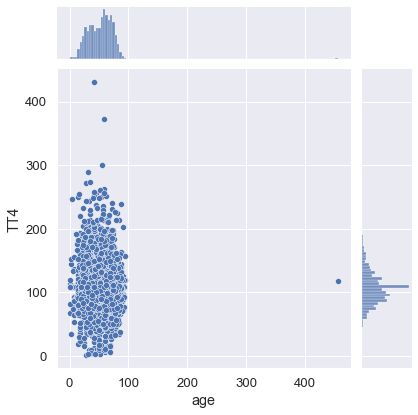

In [932]:
sns.jointplot(x="age",y="TT4",data=data,kind="scatter")

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

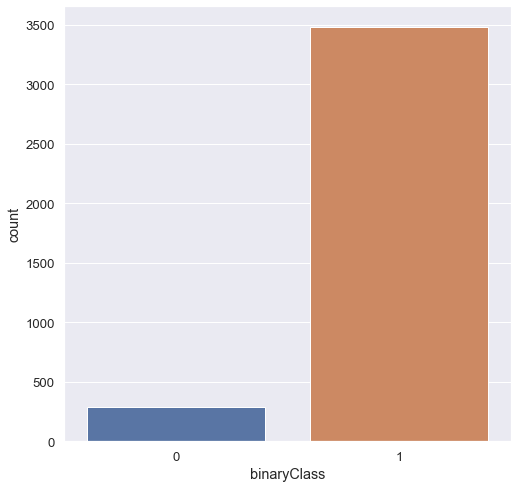

In [934]:
sns.countplot(x="binaryClass",data=data)

<AxesSubplot:xlabel='binaryClass', ylabel='count'>

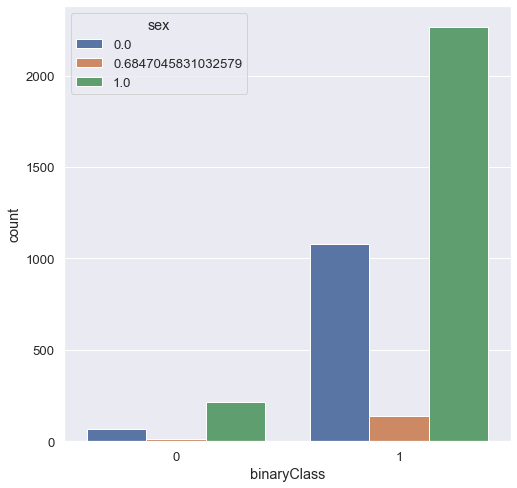

In [935]:
sns.countplot(x="binaryClass",hue="sex",data=data)

<AxesSubplot:xlabel='binaryClass', ylabel='age'>

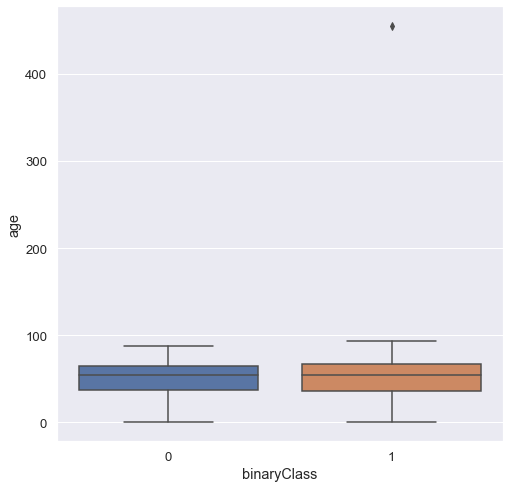

In [936]:
sns.boxplot(x="binaryClass",y="age",data=data)

In [938]:
data1=data[data.age<=(data.age.mean()+3*data.age.std())]
data1.shape

(3771, 28)

<AxesSubplot:xlabel='binaryClass', ylabel='age'>

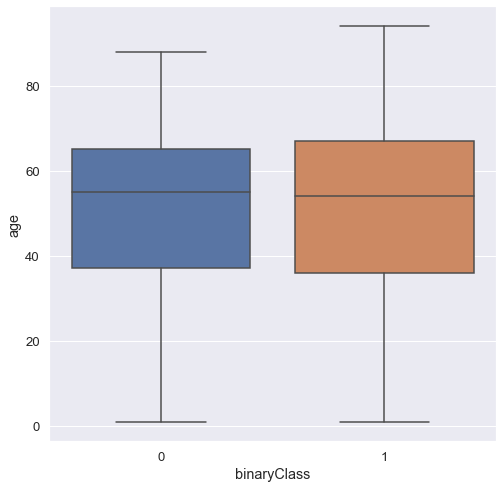

In [939]:
sns.boxplot(x="binaryClass",y="age",data=data1)

In [940]:
data1.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,-0.000087,0.017522,-0.018257,-0.066994,0.085228,-0.119454,-0.030546,0.056481,0.043314,...,0.074516,-0.227328,0.069999,-0.041380,0.088424,-0.170811,0.087554,0.054091,NaN,0.001729
sex,-0.000087,1.000000,0.098587,-0.043515,0.030505,-0.005718,0.079577,0.036610,0.020396,0.046403,...,-0.075105,0.062767,-0.073924,0.166950,-0.049409,0.225468,-0.050233,0.038571,NaN,-0.050865
on thyroxine,0.017522,0.098587,1.000000,0.005983,-0.002212,-0.042074,0.010140,0.037572,0.063362,0.094389,...,-0.145019,0.006483,0.024990,0.212835,0.038887,0.046445,0.038320,0.185732,NaN,0.081091
query on thyroxine,-0.018257,-0.043515,0.005983,1.000000,-0.012449,0.012588,0.045244,0.005855,-0.014614,-0.029816,...,-0.033395,-0.006466,0.029611,-0.004694,0.031561,0.000461,0.031431,-0.003556,NaN,0.007457
on antithyroid medication,-0.066994,0.030505,-0.002212,-0.012449,1.000000,-0.021630,0.072047,-0.012823,0.006586,-0.017271,...,0.010964,0.079212,-0.024642,0.023819,-0.029523,0.060390,-0.029779,-0.016609,NaN,0.021697
sick,0.085228,-0.005718,-0.042074,0.012588,-0.021630,1.000000,-0.024046,-0.000769,-0.025391,0.027704,...,0.006722,-0.076473,-0.005686,-0.036991,0.009417,-0.039033,0.009086,-0.021201,NaN,0.001764
pregnant,-0.119454,0.079577,0.010140,0.045244,0.072047,-0.024046,1.000000,-0.014255,-0.015052,-0.021372,...,0.026882,0.181146,0.021105,0.172501,0.032953,0.334750,0.032819,-0.016705,NaN,0.034526
thyroid surgery,-0.030546,0.036610,0.037572,0.005855,-0.012823,-0.000769,-0.014255,1.000000,0.003100,-0.012034,...,-0.023438,-0.024146,0.030499,-0.021798,0.010683,0.027948,0.010498,-0.031835,NaN,0.017642
I131 treatment,0.056481,0.020396,0.063362,-0.014614,0.006586,-0.025391,-0.015052,0.003100,1.000000,0.047288,...,0.000167,0.012056,0.032205,-0.008839,0.028552,0.009431,0.028397,-0.016824,NaN,-0.003580
query hypothyroid,0.043314,0.046403,0.094389,-0.029816,-0.017271,0.027704,-0.021372,-0.012034,0.047288,1.000000,...,-0.063515,-0.047498,0.024450,-0.008994,0.014540,0.013883,0.014123,-0.019734,NaN,-0.086264


<AxesSubplot:>

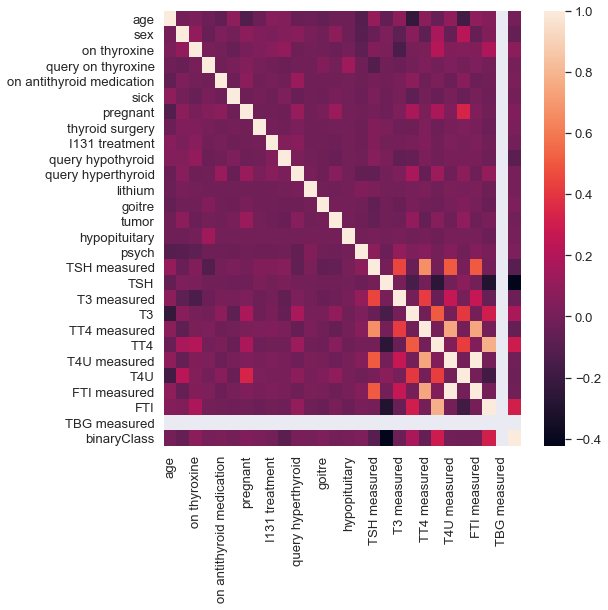

In [941]:
sns.heatmap(data1.corr())

In [942]:
x=data1.drop("binaryClass",axis=1)
y=data1.binaryClass

In [946]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [949]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3771 non-null   float64
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

In [950]:
x.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
dtype: int64

In [951]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3771, dtype: int32

In [956]:
import statsmodels.api as sm
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.55
Date:                Sat, 15 Jan 2022   Prob (F-statistic):          1.61e-213
Time:                        16:29:44   Log-Likelihood:                 178.68
No. Observations:                3771   AIC:                            -303.4
Df Residuals:                    3744   BIC:                            -135.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9680      0.058     16.704      0.000       0.854       1.082
age                        2.512e-05      0.000      0.119      0.906      -0.000       0.000
sex                          -0.0343      0.009     -3.943      0.000      -0.051      -0.017
on thyroxine                  0.0530      0.012      4.340      0.000       0.029       0.077
query on thyroxine           -0.0377      0.034     -1.109      0.268      -0.104       0.029
on antithyroid medication     0.0467      0.036      1.294      0.196      -0.024       0.117
sick                          0.0131      0.020      0.667      0.505      -0.025       0.052
pregnant                      0.0571      0.035      1.648      0.099      -0.011       0.125
thyroid surgery               0.0963      0.032      2.985      0.003       0.033       0.160
I131 treatment                0.0088      0.031      0.286      0.775      -0.051       0.069
query hypothyroid            -0.0717      0.016     -4.515      0.000      -0.103      -0.041
query hyperthyroid           -0.0258      0.016     -1.592      0.112      -0.057       0.006
lithium                       0.0434      0.055      0.792      0.429      -0.064       0.151
goitre                        0.0679      0.040      1.689      0.091      -0.011       0.147
tumor                        -0.0327      0.024     -1.342      0.180      -0.080       0.015
hypopituitary                 0.2013      0.234      0.859      0.391      -0.258       0.661
psych                         0.0223      0.018      1.246      0.213      -0.013       0.057
TSH measured                 -0.1059      0.018     -5.794      0.000      -0.142      -0.070
TSH                          -0.0040      0.000    -22.821      0.000      -0.004      -0.004
T3 measured                   0.0199      0.011      1.812      0.070      -0.002       0.041
T3                            0.0214      0.006      3.321      0.001       0.009       0.034
TT4 measured                 -0.0203      0.029     -0.708      0.479      -0.077       0.036
TT4                           0.0016      0.000      3.641      0.000       0.001       0.002
T4U measured                 -0.1136      0.165     -0.688      0.491      -0.437       0.210
T4U                          -0.1604      0.055     -2.924      0.003      -0.268      -0.053
FTI measured                  0.1419      0.165      0.862      0.389      -0.181       0.465
FTI                        6.048e-05      0.000      0.135      0.892      -0.001       0.001
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2078.283   Durbin-Watson:                   2.009
Prob(Omnibu

In [959]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [963]:
print("x_train::{}".format(x_train.shape))
print("x_test::{}".format(x_test.shape))
print("y_train::{}".format(y_train.shape))
print("y_test::{}".format(y_test.shape))

x_train::(3016, 28)
x_test::(755, 28)
y_train::(3016,)
y_test::(755,)


In [964]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [965]:
x_train

array([[ 0.        ,  0.82614229,  0.69179648, ...,  0.32926589,
        -3.18029626,  0.        ],
       [ 0.        , -0.33016467,  0.69179648, ..., -3.03705924,
         0.00752742,  0.        ],
       [ 0.        , -1.43391223, -1.50229581, ..., -3.03705924,
         0.00752742,  0.        ],
       ...,
       [ 0.        ,  0.14287   ,  0.69179648, ..., -3.03705924,
         0.00752742,  0.        ],
       [ 0.        ,  0.93126111,  0.69179648, ...,  0.32926589,
        -1.1178969 ,  0.        ],
       [ 0.        , -2.27486275,  0.69179648, ...,  0.32926589,
        -0.73714625,  0.        ]])

In [966]:
x_test

array([[ 0.        ,  0.40566703,  0.69179648, ...,  0.32926589,
         0.11954272,  0.        ],
       [ 0.        ,  1.29917696, -1.50229581, ...,  0.32926589,
        -0.76887547,  0.        ],
       [ 0.        , -0.17248645, -1.50229581, ...,  0.32926589,
        -0.67368781,  0.        ],
       ...,
       [ 0.        ,  0.51078585, -1.50229581, ...,  0.32926589,
         1.67427455,  0.        ],
       [ 0.        , -0.11992704,  0.69179648, ..., -3.03705924,
         0.00752742,  0.        ],
       [ 0.        , -1.32879342, -1.50229581, ...,  0.32926589,
         0.34164727,  0.        ]])

In [985]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [986]:
print("shape of x is ",x.shape)
print(x.shape[0])

shape of x is  (3771, 28)
3771


In [987]:
model=Sequential()
model.add(Dense(256,input_shape=[x.shape[1]],activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [991]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               7424      
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [992]:
model.compile(optimizer=Adam(),loss="binary_crossentropy",metrics=["accuracy"])

In [998]:
from keras.callbacks import ModelCheckpoint,CSVLogger,EarlyStopping
checkpoint=ModelCheckpoint("thyroid.h5",monitor='val_acc',verbose=1,save_best_only=True,mode="max")
early_stop=EarlyStopping(verbose=1,patience=20)
log_csv=CSVLogger("thyroid.csv",separator=",",append=False)

In [1000]:
callback_list=[checkpoint,early_stop,log_csv]

In [1020]:
model_main=model.fit(x=x_train,y=y_train,epochs=70,callbacks=callback_list, batch_size=64, validation_split=0.1)

Epoch 1/70
43/43 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9948 - val_loss: 0.2791 - val_accuracy: 0.9768
Epoch 2/70
43/43 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9945 - val_loss: 0.2675 - val_accuracy: 0.9834
Epoch 3/70
43/43 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.2670 - val_accuracy: 0.9834
Epoch 4/70
43/43 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9934 - val_loss: 0.2562 - val_accuracy: 0.9801
Epoch 5/70
43/43 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9956 - val_loss: 0.2493 - val_accuracy: 0.9801
Epoch 6/70
43/43 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.2719 - val_accuracy: 0.9768
Epoch 7/70
43/43 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9959 - val_loss: 0.2550 - val_accuracy: 0.9801
Epoch 8/70
43/43 [==

In [1021]:
model.evaluate(x_test,y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9894


[0.06039571017026901, 0.9894039630889893]

In [1022]:
y_pred=model.predict(x_test)
y_pred

array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.07775354e-04],
       [1.00000000e+00],
       [6.49156254e-06],
       [9.99997914e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.64321225e-06],
       [9.99830723e-01],
       [1.00000000e+00],
       [9.99998808e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.51923299e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],


In [1023]:
from sklearn.metrics import classification_report,confusion_matrix

In [1024]:
y_pred[2]

array([1.], dtype=float32)

In [1025]:
y_test

501     1
2163    1
2341    1
3602    1
3610    1
       ..
548     1
1051    1
245     1
628     1
1326    1
Name: binaryClass, Length: 755, dtype: int32

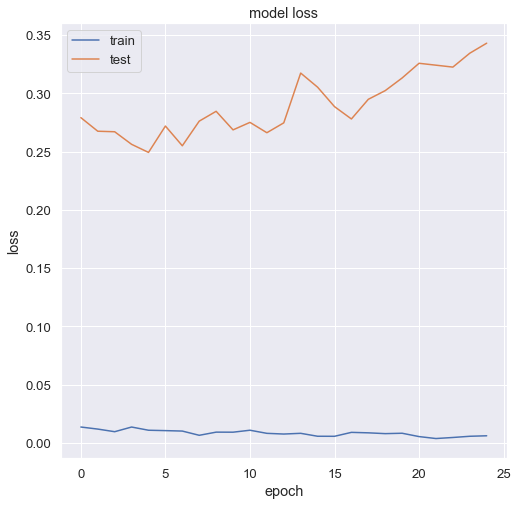

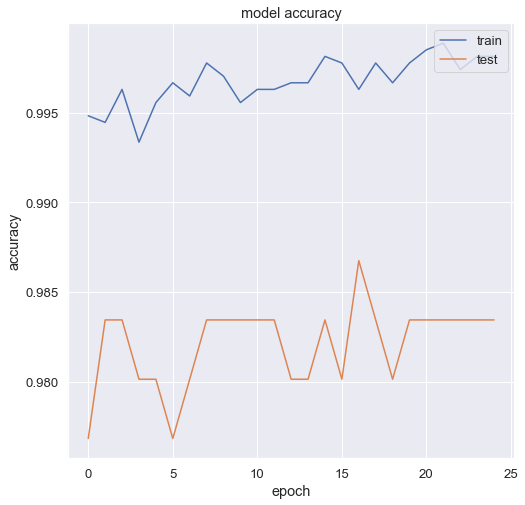

In [1026]:

plt.plot(model_main.history['loss'])
plt.plot(model_main.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model_main.history['accuracy'])
plt.plot(model_main.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [1029]:
from keras.models import load_model
model.save("thyroid.h5")

In [1032]:
model=load_model("thyroid.h5")
model.predict(sc.transform([[34.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

array([[1.]], dtype=float32)